# Stochastic estimation of equipment costs

by A. zayer

### Purpose:

Estimation of equipment costs that are part of a project bid.

Find a realistic price not too high to get the project and not too low to keep a healthy margin profit.



In [1]:
%matplotlib inline
import numpy as np
import pymc3 as pm
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
from scipy import stats
import theano
from pymc3 import Model, Normal, HalfNormal
from pymc3 import traceplot
from pymc3 import summary

The total cost is made up of the following elements:

 **Equipment cost**: 

From 30,000 up to 50,000


  **Spare parts cost  for 5 years**:
  
From 16000 to 18000

Each year is sampled separately from the normal distribution.

 **Maintenance Charges for 5 years**:

Annual rate of 12% of the equipment price (not including the spares).

In [2]:
n_years = 5
maint_rate = 0.12


**Total Cost = Equipment + Spares + Maintenance**

Where

**Spares = Spares for Year 1 + Spares for Year 2 + Spares for Year 3 + Spares for Year 4 + Spares for Year 5**

**Maintenance = Equipment \* Maintenance Rate \* Number of Years**

The objective of this simulation is to vary the price of the equipment and spares by drawing samples from the normal distribution

In [3]:
model = Model()

with model:
    
    # Priors for unknown model parameters
    equip = Normal('equip', mu=40000, sd=4)
    spare1 = Normal('spare1', mu=17000, sd=500)
    spare2 = Normal('spare2', mu=17000, sd=500)
    spare3 = Normal('spare3', mu=17500, sd=500)
    spare4 = Normal('spare4', mu=17500, sd=500)
    spare5 = Normal('spare5', mu=18000, sd=500)
    main = pm.Deterministic('Maintenance', equip*maint_rate*n_years)
    Cost = pm.Deterministic('Total Cost', main+equip+(spare1+spare2+spare3+spare4+spare5))

In [4]:
with model:
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -0.046683: 100%|██████████| 200000/200000 [00:19<00:00, 10142.39it/s]
Finished [100%]: Average ELBO = -0.058075
100%|██████████| 2000/2000 [00:03<00:00, 597.06it/s]


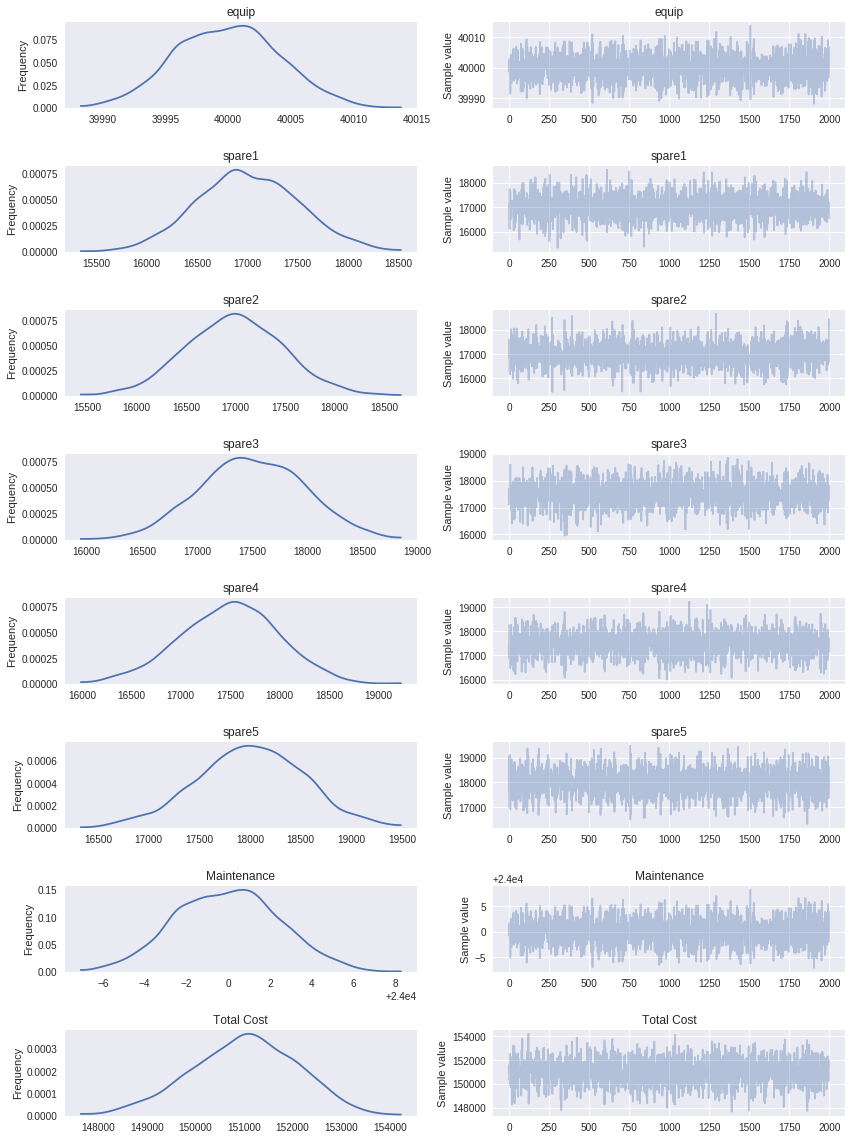

In [5]:
traceplot(trace);

In [6]:
summary(trace)


equip:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  39999.911        4.084            0.073            [39991.985, 40007.920]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  39992.108      39996.934      39999.971      40002.662      40008.160


spare1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  17010.751        502.875          10.992           [16033.033, 17994.957]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  16048.170      16661.165      16985.192      17347.038      18031.140


spare2:

  Mean             SD               MC Error         95% HPD interval
 